# Illustration of 1param Bayesian Estimation 

In [8]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.fft as fft;
import Units

In [9]:
filepath = "./Data/1param_acc_fig2/";
AList = np.loadtxt("./Data/2param_acc_Option2/Acceleration.txt");
VList = np.loadtxt("./Data/2param_acc_Option2/LatticeDepth.txt");

AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
MomProb = np.loadtxt(filepath +  "MomProb.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

/tmp/ipykernel_25721/761621253.py:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);


In [10]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape(MomProb, (AList.size,VList.size,11));


a0= 0.0; V0= 0.0;
P_actual=np.array(datamom[50,25,:]);

P_actual=P_actual/np.sum(P_actual);
P_simulated = P_actual; #No errors


In [11]:
Runs=2000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

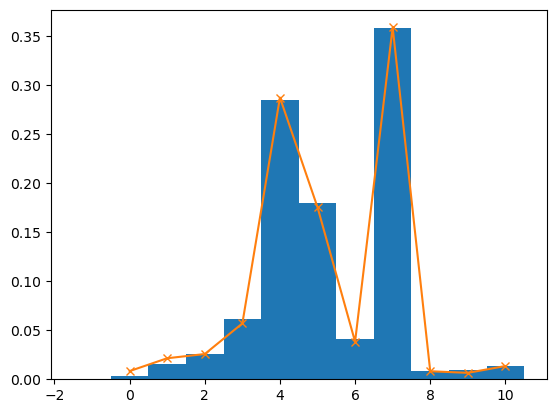

In [12]:
ax=plt.gca();
ax.hist(outcomes,  density = True,stacked = True, bins = np.arange(-1.5,11.5));
ax.plot(PossibleOutcomes, P_actual, 'x-');